In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Get the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Discover and Visualize the Data to Gain Insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.sample(60)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
101,35.0,Male,Master's,Product Marketing Manager,8.0,95000.0
67,31.0,Female,Bachelor's,Customer Service Representative,5.0,45000.0
44,41.0,Male,Master's,Strategy Consultant,13.0,130000.0
127,45.0,Male,Bachelor's,Sales Operations Manager,18.0,110000.0
203,27.0,Female,Master's,Junior UX Designer,1.5,45000.0
71,39.0,Female,Bachelor's,Recruiter,11.0,70000.0
344,44.0,Female,PhD,Senior Data Engineer,16.0,160000.0
124,44.0,Female,PhD,Senior Scientist,16.0,140000.0
313,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
245,36.0,Male,Bachelor's,Senior Operations Manager,8.0,95000.0


In [ ]:
df["Salary"].describe()

count       324.000000
mean      99985.648148
std       48652.271440
min         350.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64

In [ ]:
df.duplicated().sum()

50

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

# "Years of Experience" and "Age" have highest correlation (Choosing one of them is
# enough, but it is prefered to choose the feature that has higher correlations)

# "Years of Experience" has higher correlation with the "Salay" than "Age"

# "Age" has high correlation with "Salary"

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


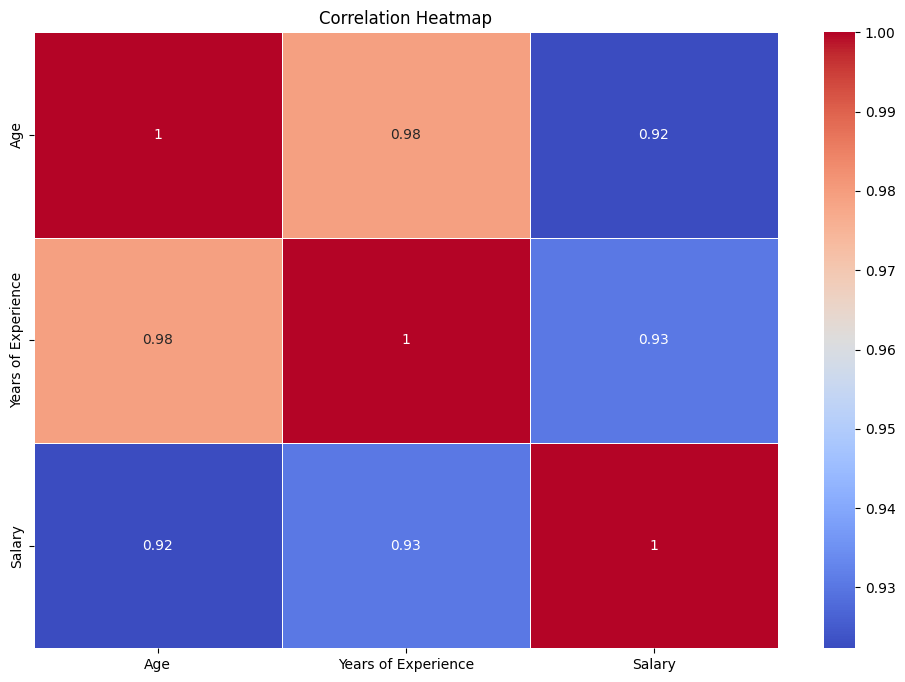

In [ ]:
# If you prefer visualize data instead of looking at numbers, you can use heatmap
# to see the correlation between attributes.

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Data cleaning **BEFORE** splitting the dataset
  1. **Drop duplicates**
  2. **Drop rows**

In [ ]:
# It is prefered to drop duplicates value before start creating
# train and test dataset.
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
Age,1
Gender,1
Education Level,1
Job Title,1
Years of Experience,1
Salary,1


In [ ]:
# null_indexes = df[df.isnull().any(axis=1)].index.tolist()
# df = df.drop(null_indexes)

df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


## Prepare data for ML Algorithms

### Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Salary")
y = df[['Salary']]


# The order is very IMPORTANT. Xs first and Ys come next
# If you did it in unordered way, it will throw an error when you try to train the model.
# So always make sure to give it in this order, as shown below:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Data cleaning **AFTER** splitting the dataset



---

# Things you must be assured to do:
1.   **Removing rows**: When removing rows, make sure to remove them before splitting the data. This can avoid you from having different length for "X_train" and "y_train" because these two must have the same size
  * To make sure, see the result by printing: X_train.shape, y_train.shape

2.   **Dropping a column**: When you drop a column, always make sure to drop the same column on your "X_test"



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>]], dtype=object)

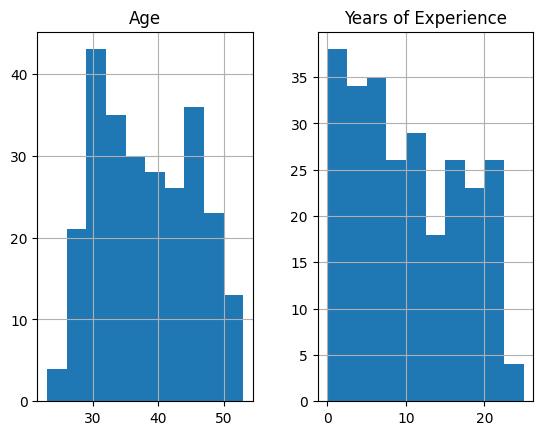

In [ ]:
X_train.hist()

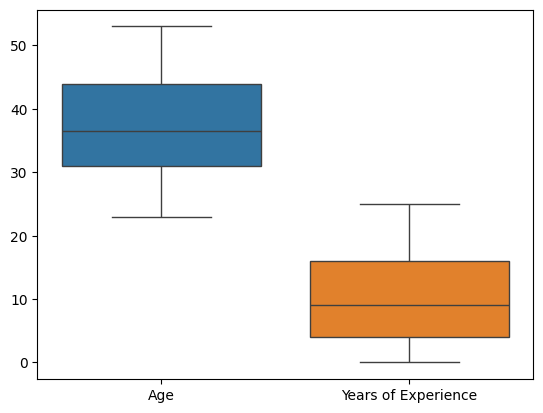

In [ ]:
sns.boxplot(df[['Age', 'Years of Experience']]);

In [ ]:
X_train.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0


In [ ]:
X_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
X_train['Gender'].value_counts()


,count
Gender,
Male,140
Female,119


In [ ]:
# This looks fine. No need to perform any actions
X_train['Education Level'].value_counts()

# But if there are many names that represent the same education level, then this
# what we would do:
# edu_dic= {'phD':'PhD', 'High School':'High School', "Bachelor's Degree":"Bachelor's",  "Master's Degree":"Master's", "Master's":"Master's", "Bachelor's":"Bachelor's", "PhD":"PhD"}
# X_train['Education Level'] = X_train['Education Level'].map(edu_dic)


,count
Education Level,
Bachelor's,154
Master's,71
PhD,34


In [ ]:
X_train['Job Title'].value_counts().head(30)

,count
Job Title,
Director of Marketing,7
Director of Operations,7
Senior Marketing Manager,6
Junior Marketing Coordinator,5
Junior Financial Analyst,5
Senior Financial Analyst,5
Senior Business Analyst,5
Senior Project Manager,5
Senior Operations Manager,4


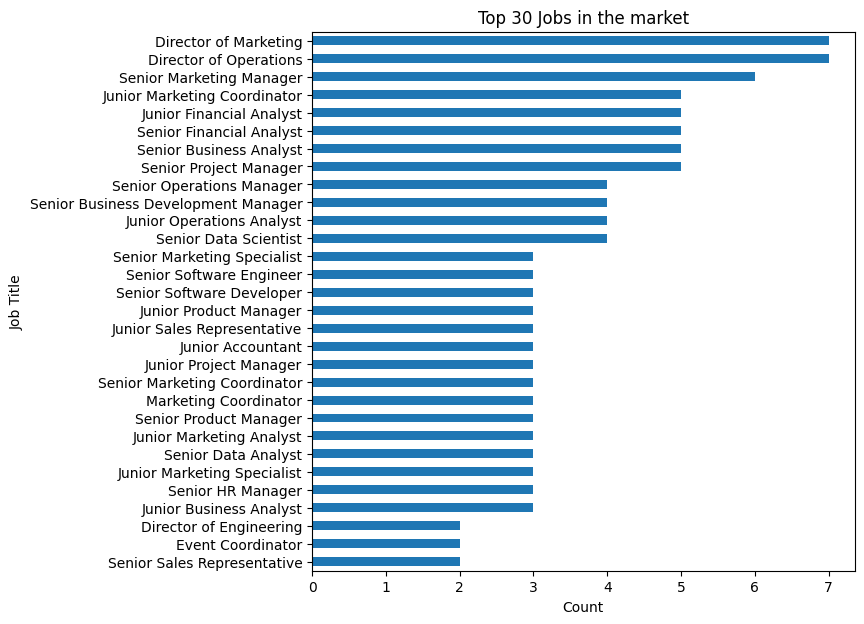

In [ ]:
X_train["Job Title"].value_counts().head(30).sort_values(ascending=True).plot(kind='barh', figsize=(7, 7))
plt.xlabel('Count')
plt.title("Top 30 Jobs in the market");



### Feature engineering

In [ ]:
X_train["Job Title"].value_counts().head(30)

,count
Job Title,
Director of Marketing,7
Director of Operations,7
Senior Marketing Manager,6
Junior Marketing Coordinator,5
Junior Financial Analyst,5
Senior Financial Analyst,5
Senior Business Analyst,5
Senior Project Manager,5
Senior Operations Manager,4


In [ ]:
positions = ['junior', 'senior', 'manager', 'director', 'chief', 'vp', 'ceo']

def extract_pos(title):
    for pos in positions:
        if pos in title.lower():
            return pos
    return "junior"

extract_pos("Director of Marketing")

'director'

In [ ]:
X_train['Position'] = X_train['Job Title'].apply(extract_pos)

X_test['Position'] = X_test['Job Title'].apply(extract_pos)

In [ ]:
X_train['Position'].value_counts()

,count
Position,
junior,109
senior,95
director,30
manager,20
chief,2
vp,2
ceo,1


In [ ]:
# For simplicity, I will drop Job title

X_train.drop(columns=['Job Title'], inplace=True)
X_test.drop(columns=['Job Title'], inplace=True)

In [ ]:
X_train.shape, y_train.shape

((259, 5), (259, 1))

In [ ]:
X_train

,Age,Gender,Education Level,Years of Experience,Position
73,28.0,Male,Bachelor's,2.0,junior
182,44.0,Female,PhD,15.0,senior
17,39.0,Male,PhD,12.0,senior
24,41.0,Male,Master's,13.0,manager
146,42.0,Female,PhD,16.0,senior
...,...,...,...,...,...
189,28.0,Male,Bachelor's,1.5,junior
71,39.0,Female,Bachelor's,11.0,junior
106,30.0,Female,Bachelor's,3.0,junior
284,35.0,Male,Bachelor's,9.0,senior


## Transformation Pipelines


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,  OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot_gender_encoder = OneHotEncoder(categories=[['Female', 'Male']])

ed_levels = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']
# Already defined above:
# positions = ['junior', 'senior', 'manager', 'director', 'chief', 'vp', 'ceo']
ordinal_encoder = OrdinalEncoder(categories=[ed_levels, positions])


cat_preprocessed = ColumnTransformer(
    transformers=[
        ('one_hot_gender', one_hot_gender_encoder, ['Gender']),
        ('ordinal_encoder', ordinal_encoder, ['Education Level', 'Position'])
    ]
)

cat_pipeline = make_pipeline(cat_preprocessed)
num_pipeline = make_pipeline(StandardScaler())

preprocessing_pipe = ColumnTransformer([
     ('cat', cat_pipeline, ['Gender', 'Education Level', 'Position']),
     ('num', num_pipeline, ['Age', 'Years of Experience'])
])



In [ ]:
# We apply the pipline only on X, the features.
X_train_preprocessed = preprocessing_pipe.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipe.transform(X_test)

In [ ]:
X_train_preprocessed.shape

(259, 6)

## Train linear and decision tree models

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()


lr.fit(X_train_preprocessed, y_train)



LinearRegression()

In [ ]:
lr.score(X_train_preprocessed, y_train)

0.9313234211495107

##### Measuring performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1) Get the prediction
y_pred = lr.predict(X_train_preprocessed)

# 2) Measure the performance
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 9814.92664092664
RMSE: 13027.556495640472


##### The result of real data and the prediction

In [ ]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

some_data_prepared = preprocessing_pipe.transform(some_data)
print("Predictions:", lr.predict(some_data_prepared))
print("Labels:", some_labels)

Predictions: [[ 45312.]
 [145920.]
 [134016.]
 [137728.]
 [141440.]]
Labels:        Salary
73    40000.0
182  145000.0
17   115000.0
24   140000.0
146  150000.0


#### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(X_train_preprocessed, y_train)

0.9937810021827358

##### Measuring performance

In [ ]:
dt_y_pred = dt.predict(X_train_preprocessed)
dt_mae = mean_absolute_error(y_train, dt_y_pred)
dt_mse = mean_squared_error(y_train, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)

print("MAE:", dt_mae)
print("RMSE:", dt_rmse)


MAE: 1584.4272844272843
RMSE: 3920.2958349746305


##### The result of real data and the prediction

In [ ]:
some_data_dt = X_train.iloc[:5]
some_labels_dt = y_train.iloc[:5]

some_data_dt_prepared = preprocessing_pipe.transform(some_data_dt)

print("Prediction:", dt.predict(some_data_dt_prepared))
print("Labels:", some_labels_dt)

Prediction: [ 40000.         148333.33333333 115000.         140000.
 150000.        ]
Labels:        Salary
73    40000.0
182  145000.0
17   115000.0
24   140000.0
146  150000.0
